# Polynomial regression
Fit data with a polynomial.  To force overfitting, take Gaussian noise with "large" variance and use a polynomial of "high" degree.

---
tags: pytorch, exploration, polynomial regression, curve fitting

# Imports

In [1]:
from tqdm import tqdm

import torch
from torch.nn import Module, Sequential, Linear, MSELoss
from torch.optim import SGD

import matplotlib.pyplot as plt
%matplotlib inline

# Custom class

In [2]:
class Powers(Module):
    def __init__(self, d):
        r"""Argument `d` is degree of polynomial."""
        super(Powers, self).__init__()
        self.d = d
        
    def forward(self, x):
        r"""Returns (positive) powers of input tensor."""
        return torch.cat([x**i for i in range(1, self.d+1)], 1)
   

100%|██████████| 100/100 [00:00<00:00, 2683.56it/s]


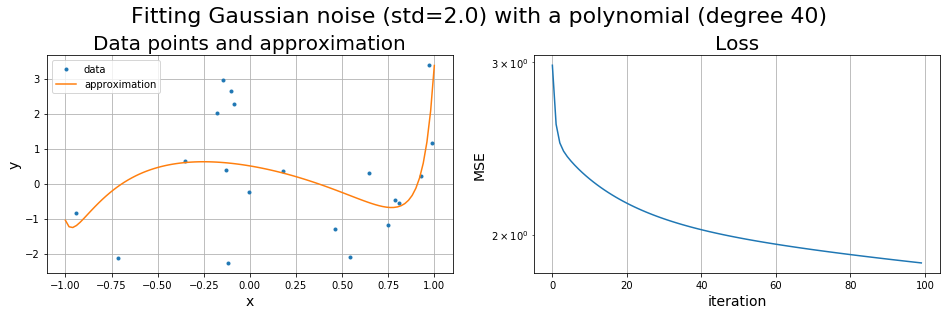

In [3]:
torch.manual_seed(12346) # for reproducibility

# Parameters: data and setup
d = 40 # degree of polynomial approximating data
lr = .1
n_epochs = 100
n = 20 # nb samples
std = 2. # samples are Gaussian with zero mean

# Data
x = -1. + 2.*torch.rand(n, 1)
y = std*torch.randn(n, 1)

# Training setup
model = Sequential(Powers(d), Linear(d,1))

criterion = MSELoss(reduction='mean')
optimizer = SGD(model.parameters(), lr=lr)

losses = []

# Training
for _ in tqdm(range(n_epochs)):
    optimizer.zero_grad()
    preds = model(x)
    loss = criterion(preds, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.data.item())

    
# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

ax = axs[0]
inputs = torch.linspace(-1., 1., 101).view(-1, 1)
with torch.no_grad():
    outputs = model(inputs)
ax.plot(x, y, '.', label='data')
ax.plot(inputs, outputs, '-', label='approximation')
ax.grid();
ax.legend();
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_title("Data points and approximation", fontsize=20);

ax = axs[1]
ax.plot(losses)
ax.grid();
ax.set_yscale('log')
ax.set_xlabel("iteration", fontsize=14)
ax.set_ylabel("MSE", fontsize=14)
ax.set_title("Loss", fontsize=20);


fig.suptitle(f"Fitting Gaussian noise (std={std}) with a polynomial (degree {d})", fontsize=22, y=1.05);